In [29]:

import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
df_songs = pd.read_csv("/kaggle/input/song-lyrics/all_lyrics.csv")
df_songs.rename(columns = {"type" : "Genres", "lyrics" : "Lyric"},inplace = True)
df_songs

,song,artist,Genres,Lyric
0,Stairway to Heaven,Led Zeppelin,rock,Stairway to Heaven Lyrics[Intro]\n\n[Verse 1]\...
1,Hey Jude,Beatles,rock,Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...
2,All Along the Watchtower,"Hendrix, Jimi",rock,"Ii. Tambourine Lyrics[Chorus, sung]\nHey, Pip,..."
3,Satisfaction,Rolling Stones,rock,"Sin título I Lyrics[Letra de ""Sin título I""]\n..."
4,Like A Rolling Stone,"Dylan, Bob",rock,Like a Rolling Stone Lyrics[Verse 1]\nOnce upo...
...,...,...,...,...
3995,Motown 25,Elzhi,rap & hip hop,Motown 25 Lyrics[Verse 1: eLZhi]\nI end career...
3996,How Ya Like Me Now,Kool Moe Dee,rap & hip hop,"How Ya Like Me Now Lyrics""All aboard for the n..."
3997,Coastin’,Zion I feat. K.Flay,rap & hip hop,Coastin’ LyricsWhen life brings trouble\nYou c...
3998,Head Banger,EPMD,rap & hip hop,Headbanger Lyrics[Redman]\nNegroes!!!!!!!!\n\n...


In [31]:
df_songs.count()

song      4000
artist    4000
Genres    4000
Lyric     3896
dtype: int64

In [32]:
df_songs.head(2)

,song,artist,Genres,Lyric
0,Stairway to Heaven,Led Zeppelin,rock,Stairway to Heaven Lyrics[Intro]\n\n[Verse 1]\...
1,Hey Jude,Beatles,rock,Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...


In [33]:
for i in range(0,len(df_songs.axes[0])):
    x = df_songs.Genres[i]
    for j in range(0,len(x)):
        if(x[j] == ';'):
            x = x[0:j]
            df_songs.Genres[i] = x
            break
df_songs.Genres

0                rock
1                rock
2                rock
3                rock
4                rock
            ...      
3995    rap & hip hop
3996    rap & hip hop
3997    rap & hip hop
3998    rap & hip hop
3999    rap & hip hop
Name: Genres, Length: 4000, dtype: object

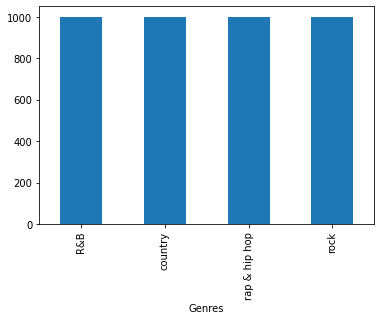

In [34]:
df_songs.head()
import matplotlib.pyplot as plt
fig = plt.figure()
df_songs.groupby('Genres').Genres.count().plot.bar(ylim=0)
plt.show()

In [35]:
arr = []
for i in range(0,4000):
    if(type(df_songs.Lyric[i]) == float):
        arr.append(df_songs.song[i])
for i in arr:
    df_songs = df_songs.drop(df_songs[df_songs.song  ==  i].index)
df_songs.count()

song      3888
artist    3888
Genres    3888
Lyric     3888
dtype: int64

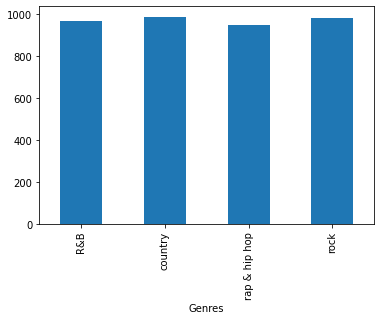

In [36]:
df_songs.head()
import matplotlib.pyplot as plt
fig = plt.figure()
df_songs.groupby('Genres').Genres.count().plot.bar(ylim=0)
plt.show()

In [37]:
x = df_songs.Genres.unique()

songs_idx = {}
idx_to_songs = {}
j = 0
for i in x:
    songs_idx[i] = j
    idx_to_songs[j] = i
    j += 1
songs_idx

{'rock': 0, 'country': 1, 'R&B': 2, 'rap & hip hop': 3}

In [38]:
genre_arr = df_songs.Genres.map(songs_idx)
df_songs['category_id'] = genre_arr
df_songs.sample(5)
idx_to_songs

{0: 'rock', 1: 'country', 2: 'R&B', 3: 'rap & hip hop'}

In [39]:
category_id_df = df_songs[['Genres', 'category_id']].drop_duplicates()
category_id_df

,Genres,category_id
0,rock,0
1000,country,1
2000,R&B,2
3001,rap & hip hop,3


In [54]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
lyrics_vector = tfidf.fit_transform(df_songs.Lyric).toarray()
labels = df_songs.category_id
lyrics_vector.shape

(3888, 47448)

In [55]:
N = 4
for genre, category_id in sorted(songs_idx.items()):
  features_chi2 = chi2(lyrics_vector, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  print(feature_names)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(genre))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

['saw face' 'guns roses' 'anthem lost' ... 'ooh' 'oh baby' 'baby']

==> R&B:
  * Most Correlated Unigrams are: girl, oh, ooh, baby
  * Most Correlated Bigrams are: love love, baby baby, oh oh, oh baby
['fro' 'real slick' 'sherwood' ... 'cowboy' 'whiskey' 'country']

==> country:
  * Most Correlated Unigrams are: niggas, cowboy, whiskey, country
  * Most Correlated Bigrams are: dirt road, luke bryan, lyrics verse, honky tonk
['left right' 'right yeah' 'juicy notorious' ... 'shit' 'nigga' 'niggas']

==> rap & hip hop:
  * Most Correlated Unigrams are: yo, shit, nigga, niggas
  * Most Correlated Bigrams are: method man, yo yo, lyrics produced, hip hop
['let sing' 'projector' 'feeling right' ... 'instrumental' 'solo'
 'guitar solo']

==> rock:
  * Most Correlated Unigrams are: mccartney, guitar, instrumental, solo
  * Most Correlated Bigrams are: rock roll, solo verse, intro verse, guitar solo


In [56]:
X = df_songs['Lyric']
Y = df_songs['Genres']
print(Y.unique())
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

['rock' 'country' 'R&B' 'rap & hip hop']


In [57]:
X

0       Stairway to Heaven Lyrics[Intro]\n\n[Verse 1]\...
1       Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...
2       Ii. Tambourine Lyrics[Chorus, sung]\nHey, Pip,...
3       Sin título I Lyrics[Letra de "Sin título I"]\n...
4       Like a Rolling Stone Lyrics[Verse 1]\nOnce upo...
                              ...                        
3995    Motown 25 Lyrics[Verse 1: eLZhi]\nI end career...
3996    How Ya Like Me Now Lyrics"All aboard for the n...
3997    Coastin’ LyricsWhen life brings trouble\nYou c...
3998    Headbanger Lyrics[Redman]\nNegroes!!!!!!!!\n\n...
3999    Sound Bwoy Bureill Lyrics[Intro: Sample from C...
Name: Lyric, Length: 3888, dtype: object

In [43]:
models = [
    LinearSVC(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, lyrics_vector, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [44]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.778026,0.019324
LogisticRegression,0.774169,0.017444


In [45]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(lyrics_vector, 
                                                               labels, 
                                                               df_songs.index, test_size=0.25, 
                                                             random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df_songs['Genres'].unique()))

				CLASSIFICATIION METRICS

               precision    recall  f1-score   support

         rock       0.71      0.61      0.66       256
      country       0.76      0.78      0.77       258
          R&B       0.69      0.70      0.69       231
rap & hip hop       0.86      0.96      0.90       227

     accuracy                           0.76       972
    macro avg       0.75      0.76      0.76       972
 weighted avg       0.75      0.76      0.75       972



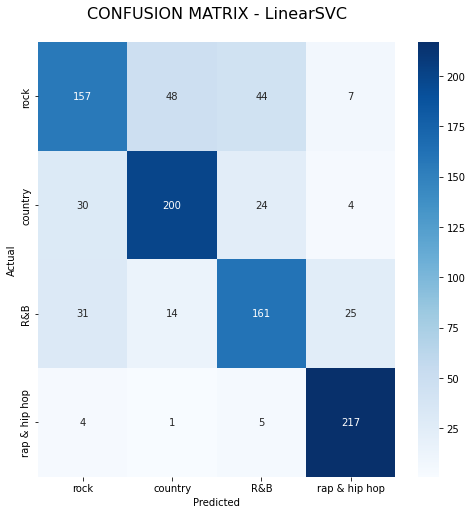

In [48]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Genres.values, 
            yticklabels=category_id_df.Genres.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [49]:
import pickle
FILE  = 'model.sav'
pickle.dump(model,open(FILE,'wb'))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [51]:
import random
x = random.randint(0,3800)
lyrics = df_songs.Lyric[x];
print(lyrics)
print(model.predict(fitted_vectorizer.transform([lyrics])))
print(df_songs.Genres[x])

Cherchez La Ghost Lyrics[Intro: Madam Majestic]
Tommy Mottola, lives on the road
He lost his lady, two months ago
Maybe he'll find her, maybe he won't
Oh wonder that love

[Verse 1: Ghostface Killah, (U-God)]
Brothers try to pass me, but none could match me
No girl can freak me, I'm just too nasty
Lost on the dance floors, I attack y'all
Snuck through the back door, guess who they saw?
Goldie and Ghost, black African Rose
Star-studded low lenses, plus the mural was dope
Airbrush W-B's, STOP! (Shake your body, body)
And cop a couple of these (She's a hottie, hottie)
[Interlude: Madam Majestic]
Schott Free and Sean C, very upset
They're sick and tired of living in debt
Tired of roaches and tired of
Rats
I know they are over

[Verse 2: U-God]
One in the head, I'm fed, this is how we doin
Put a Ruff Rider on my dick, bust right through 'em
Come out your shirt, insert the party rhyme
Fine Dr. Buzzard, Bacardi Lime
We passin it, takes the shake your Calvin Klein
Before the floor gets moist, 

In [52]:
import pickle
FILE  = 'fixedmodel.sav'
FILE2 = 'transformer.sav'
pickle.dump(fitted_vectorizer,open(FILE2,'wb'))
pickle.dump(model,open(FILE,'wb'))